In [3]:
!pip install nltk 


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from scipy.sparse import dok_matrix
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
warn()

In [5]:
def print_sample_and_class(data, class_=1,n_samples=5):

    index=data[data['y']==class_]['X'].index[0:n_samples]

    for i in index:
        print("sample {} of class {}".format(i,class_))
        print(data[data['y']==class_]['X'][i])

In [6]:
df=  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X'])
df.head()

,y,X
0,1,The Rock is destined to be the 21st Century '...
1,1,The gorgeously elaborate continuation of `` T...
2,1,Singer\/composer Bryan Adams contributes a sl...
3,0,You 'd think by now America would have had en...
4,1,Yet the act is still charming here .


In [7]:

print_sample_and_class(df, class_=1,n_samples=5)

sample 0 of class 1
 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
sample 1 of class 1
 The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
sample 2 of class 1
 Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
sample 4 of class 1
 Yet the act is still charming here .
sample 5 of class 1
 Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .


In [8]:
my_string=df['X'][0]
print("document:",my_string)
print("\n type:",type(my_string))

document:  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .

 type: <class 'str'>


In [9]:
my_string[0:10]

' The Rock '

In [10]:
my_string.split()

['The',
 'Rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'Century',
 "'s",
 'new',
 '``',
 'Conan',
 "''",
 'and',
 'that',
 'he',
 "'s",
 'going',
 'to',
 'make',
 'a',
 'splash',
 'even',
 'greater',
 'than',
 'Arnold',
 'Schwarzenegger',
 ',',
 'Jean-Claud',
 'Van',
 'Damme',
 'or',
 'Steven',
 'Segal',
 '.']

In [11]:
my_string.casefold()

" the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal ."

In [12]:
df["X"].str.casefold()

0        the rock is destined to be the 21st century '...
1        the gorgeously elaborate continuation of `` t...
2        singer\/composer bryan adams contributes a sl...
3        you 'd think by now america would have had en...
4                    yet the act is still charming here .
                              ...                        
8539                                      a real snooze .
8540                                       no surprises .
8541     we 've seen the hippie-turned-yuppie plot bef...
8542     her fans walked out muttering words like `` h...
8543                                  in this case zero .
Name: X, Length: 8544, dtype: object

In [13]:
good_words = ['love', 'good','excellent', 'great','charming']


bad_words = ['hate', 'bad','brutal', 'damnable', 'deplorable', 'detestable', 'disastrous', 'dreadful']


In [14]:
df["score"]=0
for bad_word in bad_words:
    df["score"]-=df["X"].str.casefold().str.count(bad_word)

In [15]:
for good_words in good_words:
    df["score"]+=df["X"].str.casefold().str.count(good_words)

In [16]:
df.head()

,y,X,score
0,1,The Rock is destined to be the 21st Century '...,1
1,1,The gorgeously elaborate continuation of `` T...,0
2,1,Singer\/composer Bryan Adams contributes a sl...,0
3,0,You 'd think by now America would have had en...,0
4,1,Yet the act is still charming here .,1


In [17]:
df.loc[df["score"].argmax(axis=0),'X']

' Good fun , good action , good acting , good dialogue , good pace , good cinematography .'

In [18]:
df.loc[df["score"].argmin(axis=0),'X']

' It is that rare combination of bad writing , bad direction and bad acting -- the trifecta of badness .'

In [19]:
df.groupby('y').mean()

,score
y,
-1,0.003021
0,0.057882
1,0.106094


y
-1    AxesSubplot(0.125,0.125;0.775x0.755)
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

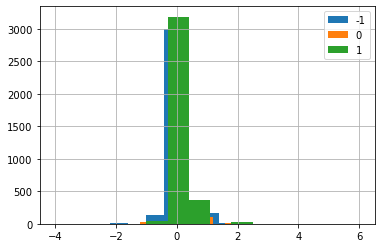

In [20]:
df[["score","y"]].groupby('y')["score"].hist(legend=True)

In [26]:
df['yhat']=0

In [25]:
negative_label=df[['score']].sum(axis=1)<1
pos_label=df[['score']].sum(axis=1)>-1

In [23]:
df['yhat'][negative_label]=-1
df['yhat'][pos_label]=1

In [24]:
df['y'].value_counts()

 1    3610
-1    3310
 0    1624
Name: y, dtype: int64

In [27]:
np.mean(df['yhat']==df['y'])

0.1900749063670412

In [28]:
train_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
validation_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/dev.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
test_dataset =pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/test.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer


In [30]:
corpus = [
    'This is the first of document .',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?' ]

In [31]:
vectorizer=CountVectorizer()

X_toy = vectorizer.fit_transform(corpus)
X_toy 

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [32]:
vectorizer. get_feature_names()

['and',
 'document',
 'first',
 'is',
 'of',
 'one',
 'second',
 'the',
 'third',
 'this']

In [33]:
X_toy.toarray()

array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]])

In [34]:
original_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
original_toy_df

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


In [35]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [36]:
dataset=pd.concat([train_dataset,validation_dataset],axis=0)
from sklearn.model_selection import PredefinedSplit

split_index = [-1]*train_dataset.shape[0] + [0]*validation_dataset.shape[0]
pds = PredefinedSplit(test_fold = split_index)

In [37]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['X'])
y=dataset['y']

In [38]:
X_test=vectorizer.transform(test_dataset['X'])
y_test=test_dataset[['y']]

In [39]:
param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20)}

In [40]:
clf = GridSearchCV(estimator = LogisticRegression(),cv=pds,param_grid=param_grid)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [41]:
clf.fit(X, y)
print("highest accuracy in the validation accuracy ",clf.best_score_)
print("best hyperparameters:",clf.best_params_)

highest accuracy in the validation accuracy  0.6194368755676658
best hyperparameters: {'C': 0.23357214690901212, 'penalty': 'l2'}


In [42]:
print(" best parameters accuracy score :",clf.score(X_test,y_test))

 best parameters accuracy score : 0.6497737556561086


In [43]:
model=clf.best_estimator_

In [44]:
model.predict(X_test)

array([ 0,  1,  1, ...,  1, -1, -1])

In [45]:
feature_importance=np.argsort(model.coef_)

In [46]:
for class_ in range(3):
    
    print("(j) or y=",class_)
    print(np.array(vectorizer.get_feature_names())[feature_importance[class_,0:10]])
   

(j) or y= 0
['solid' 'powerful' 'enjoyable' 'best' 'hilarious' 'fun' 'perfectly'
 'charming' 'always' 'human']
(j) or y= 1
['offers' 'screen' 'imagine' 'thoroughly' 'crafted' 'impressive' 'going'
 'frequently' 'watching' 'four']
(j) or y= 2
['suffers' 'dull' 'worst' 'mess' 'too' 'unfortunately' 'lack' 'less'
 'plain' 'bad']


In [47]:
def build_feature_map(X):

    word_types =set()
    #Split string into words usig split() then apply(set) 
    for x in X.str.casefold().str.split().apply(set):
        
        word_types=word_types.union(x)
    
    # Create a dictionary keyed by word mapping it to an index
    return   {word: idx for idx, word in enumerate(word_types)}

word_to_idx = build_feature_map(train_dataset["X"])

In [48]:

def extract_features(word_to_idx, X):
    D=len(word_to_idx)
    N=X.shape[0]
    words=set(word_to_idx.keys())
    
    features = dok_matrix((N, D))
    for row,x in enumerate(X[0:]):
        for word in x.split():
            if word in words:
                features[row,word_to_idx[word.casefold()]]+=1
    return features

X_train= extract_features(word_to_idx, train_dataset["X"])

In [49]:
X_train= extract_features(word_to_idx, train_dataset["X"])
y_train=train_dataset[["y"]]

X_val=extract_features(word_to_idx, validation_dataset["X"])
y_val=validation_dataset[['y']]
X_test=extract_features(word_to_idx, test_dataset["X"])
y_test=test_dataset[['y']]
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("validation accuracy ",lr.score(X_val,y_val))
print("test accuracy ",lr.score(X_test,y_test))

validation accuracy  0.5912806539509536
test accuracy  0.6339366515837104


In [50]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shravaninag/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
print(stopwords.words('english')[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [52]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_toy = vectorizer.fit_transform(corpus)

In [53]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()

,document,first,one,second,third
This is the first of document .,1,1,0,0,0
This document is the second document.,2,0,0,1,0
And this is the third one.,0,0,1,0,1
Is this the first document?,1,1,0,0,0


In [54]:
min_df=2
vectorizer = CountVectorizer(min_df=min_df)
X_toy = vectorizer.fit_transform(corpus)
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()

,document,first,is,the,this
This is the first of document .,1,1,1,1,1
This document is the second document.,2,0,1,1,1
And this is the third one.,0,0,1,1,1
Is this the first document?,1,1,1,1,1


In [55]:
original_toy_df.head()

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


In [56]:
max_df=0.75
vectorizer = CountVectorizer(max_df=0.75)
X_toy = vectorizer.fit_transform(corpus)

In [57]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names(),index=corpus )
new_toy_df.head()

,and,document,first,of,one,second,third
This is the first of document .,0,1,1,1,0,0,0
This document is the second document.,0,2,0,0,0,1,0
And this is the third one.,1,0,0,0,1,0,1
Is this the first document?,0,1,1,0,0,0,0


In [58]:
from sklearn.pipeline import Pipeline

In [59]:
pipe = Pipeline(steps=[("CV", CountVectorizer()),  ("LR", LogisticRegression())])
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}

In [60]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', CountVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                              

In [61]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', CountVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                              

In [62]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)

highest accuracy in the validation 0.5967302452316077
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['i'], 'LR__penalty': 'l2'}


In [63]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.639366515837104


In [64]:
 corpus

['This is the first of document .',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [65]:
vectorizer=CountVectorizer()
X_toy = vectorizer.fit_transform(corpus)

In [66]:
tf_dataframe=pd.DataFrame(X_toy.toarray(),index=corpus,columns=vectorizer.get_feature_names())
tf_dataframe

,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0,1,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,0,1,1,0,1
And this is the third one.,1,0,0,1,0,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,0,1,0,1


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
pd.DataFrame(TfidfTransformer().fit_transform(tf_dataframe).toarray(),index=corpus,columns=vectorizer.get_feature_names())


,and,document,first,is,of,one,second,the,third,this
This is the first of document .,0.000000,0.378357,0.467346,0.309332,0.592769,0.000000,0.000000,0.309332,0.000000,0.309332
This document is the second document.,0.000000,0.687624,0.000000,0.281089,0.000000,0.000000,0.538648,0.281089,0.000000,0.281089
And this is the third one.,0.511849,0.000000,0.000000,0.267104,0.000000,0.511849,0.000000,0.267104,0.511849,0.267104
Is this the first document?,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.000000,0.384085,0.000000,0.384085


In [69]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
pipe = Pipeline(steps=[("CV", TfidfVectorizer()),  ("LR", LogisticRegression())])

In [71]:
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}

In [72]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', TfidfVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                              

In [73]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', TfidfVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['i'],
                                            ['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'you...,
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                              

In [74]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)


highest accuracy in the validation 0.6294277929155313
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['i'], 'LR__penalty': 'l2'}


In [75]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.6579185520361991


In [76]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.6579185520361991
